In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [33]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

###ANALISIS HIPOTESIS 1

In [34]:
sdf1 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/sdf')

##PODEMOS OBSRVAR QUE LA MAYORIA DE LOS ATAQUES PERTENCECN A LA CATEGORIA 'UNPROVOKED'

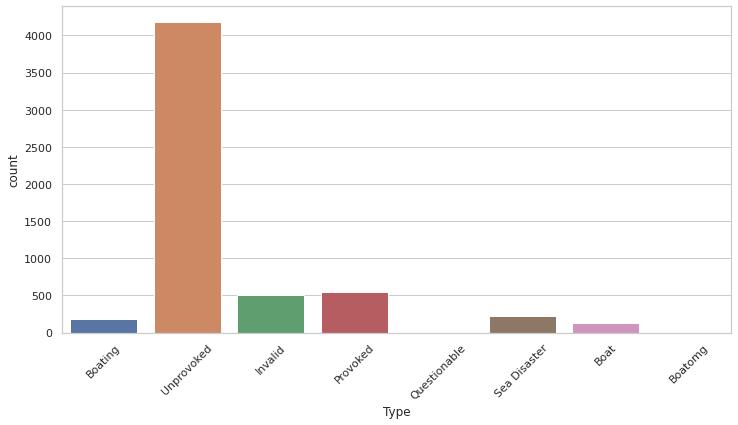

In [35]:
g = sns.countplot(x=sdf1['Type'])
g.tick_params(axis='x', rotation=45);

In [36]:
ataques_mensuales = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/ataques_mensuales')

In [37]:
ataques_mensuales.describe()

,Monthly Attacks
count,12.000000
mean,480.583333
std,89.497037
min,382.000000
25%,408.250000
50%,450.000000
75%,528.000000
max,668.000000


<AxesSubplot:xlabel='Month', ylabel='Monthly Attacks'>

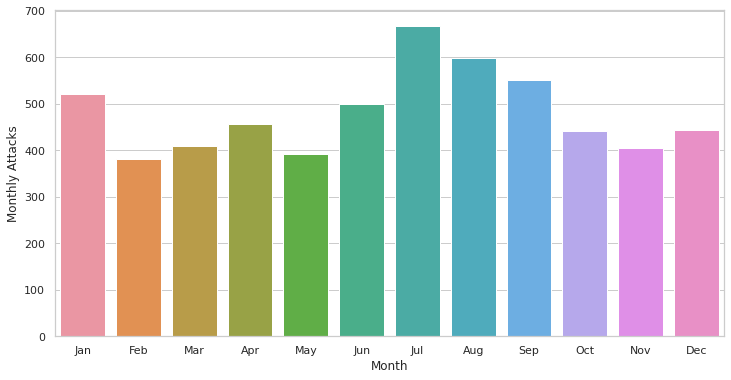

In [38]:
sns.barplot(x='Month', y='Monthly Attacks', data=ataques_mensuales)

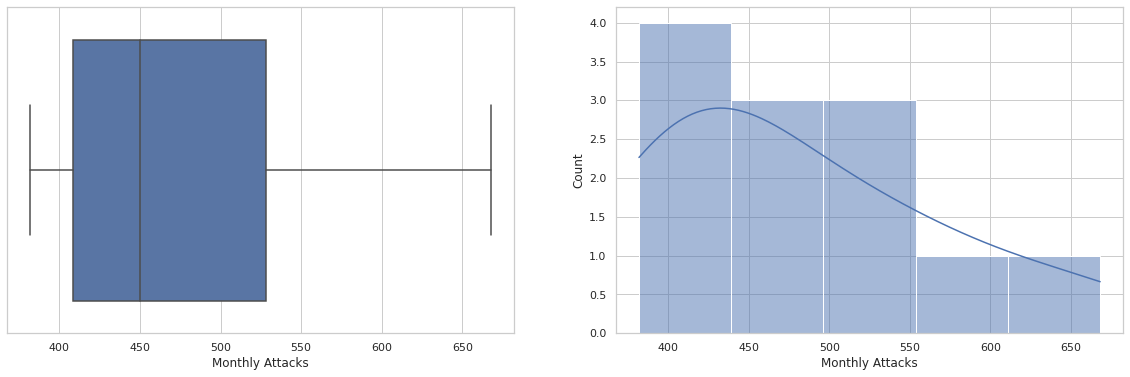

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.boxplot(x='Monthly Attacks', data=ataques_mensuales, ax = ax[0])
sns.histplot(x=ataques_mensuales['Monthly Attacks'], kde=True, ax = ax[1]);


###ANALISIS Y VISUALIZACION HIPOTESIS 2